In [1]:
import pandas as pd
import numpy as np
#import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
important_cols = ['respondent_id', 'agency_abbr', 'loan_type_name', 'property_type_name',
       'loan_purpose_name', 'owner_occupancy_name', 'loan_amount_000s',
       'preapproval_name', 'action_taken_name', 'msamd_name', 'state_abbr',
       'county_name', 'census_tract_number', 'applicant_ethnicity_name',
       'co_applicant_ethnicity_name', 'applicant_race_name_1',
       'applicant_race_name_2', 'applicant_race_name_3',
       'applicant_race_name_4', 'applicant_race_name_5',
       'co_applicant_race_name_1', 'co_applicant_race_name_2',
       'co_applicant_race_name_3', 'co_applicant_race_name_4',
       'co_applicant_race_name_5', 'applicant_sex_name',
       'co_applicant_sex_name', 'applicant_income_000s', 'purchaser_type_name',
       'denial_reason_name_1', 'denial_reason_name_2', 'denial_reason_name_3',
       'rate_spread', 'hoepa_status_name', 'lien_status_name', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units']
df_2017 = pd.read_csv('data/hmda_2017_nationwide_all-records_labels.csv',usecols = important_cols,nrows = 10000)
df_2017['denied'] = df_2017[['denial_reason_name_1']].applymap(lambda x : 1 if x==x else 0)
df_2017.head()

C:\Users\maxym\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (44,46,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,respondent_id,agency_abbr,loan_type_name,property_type_name,loan_purpose_name,owner_occupancy_name,loan_amount_000s,preapproval_name,action_taken_name,msamd_name,...,rate_spread,hoepa_status_name,lien_status_name,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,denied
0,75-2921540,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,53.0,Not applicable,Application withdrawn by applicant,Philadelphia - PA,...,NaN,Not a HOEPA loan,Secured by a first lien,3202.0,97.279999,57400.0,47.540001,710.0,1314.0,0
1,0000504713,CFPB,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,168.0,Not applicable,Application denied by financial institution,"Spokane, Spokane Valley - WA",...,NaN,Not a HOEPA loan,Secured by a first lien,3733.0,4.580000,63900.0,86.239998,861.0,1241.0,1
2,7810600004,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,103.0,Not applicable,File closed for incompleteness,Salt Lake City - UT,...,NaN,Not a HOEPA loan,Secured by a first lien,5498.0,37.919998,75400.0,63.939999,1270.0,1658.0,0
3,42-1739728,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Not owner-occupied as a principal dwelling,88.0,Not applicable,Loan originated,Springfield - MO,...,NaN,Not a HOEPA loan,Secured by a first lien,3566.0,11.830000,55200.0,74.290001,573.0,1261.0,0
4,42-1739728,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,90.0,Not applicable,Application withdrawn by applicant,"Chicago, Naperville, Arlington Heights - IL",...,NaN,Not a HOEPA loan,Secured by a first lien,2910.0,48.660000,77500.0,79.250000,599.0,26.0,0


In [15]:
df_2017.to_csv('sample_data/sample_2017.csv')

In [4]:
df_2017 = pd.read_csv('sample_data/sample_2017.csv').drop(columns = ['Unnamed: 0'])
df_2017.head()

,respondent_id,agency_abbr,loan_type_name,property_type_name,loan_purpose_name,owner_occupancy_name,loan_amount_000s,preapproval_name,action_taken_name,msamd_name,...,rate_spread,hoepa_status_name,lien_status_name,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,denied
0,75-2921540,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,53.0,Not applicable,Application withdrawn by applicant,Philadelphia - PA,...,NaN,Not a HOEPA loan,Secured by a first lien,3202.0,97.279999,57400.0,47.540001,710.0,1314.0,0
1,0000504713,CFPB,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,168.0,Not applicable,Application denied by financial institution,"Spokane, Spokane Valley - WA",...,NaN,Not a HOEPA loan,Secured by a first lien,3733.0,4.580000,63900.0,86.239998,861.0,1241.0,1
2,7810600004,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,103.0,Not applicable,File closed for incompleteness,Salt Lake City - UT,...,NaN,Not a HOEPA loan,Secured by a first lien,5498.0,37.919998,75400.0,63.939999,1270.0,1658.0,0
3,42-1739728,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Not owner-occupied as a principal dwelling,88.0,Not applicable,Loan originated,Springfield - MO,...,NaN,Not a HOEPA loan,Secured by a first lien,3566.0,11.830000,55200.0,74.290001,573.0,1261.0,0
4,42-1739728,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,90.0,Not applicable,Application withdrawn by applicant,"Chicago, Naperville, Arlington Heights - IL",...,NaN,Not a HOEPA loan,Secured by a first lien,2910.0,48.660000,77500.0,79.250000,599.0,26.0,0


In [3]:
# Summary of all quantitative fields
df_2017.describe()

,loan_amount_000s,census_tract_number,applicant_income_000s,rate_spread,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,denied
count,9994.000000,9964.000000,9025.000000,210.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,10000.000000
mean,226.185111,1762.902636,108.377175,2.461619,5353.984845,39.056268,71092.071457,105.239846,1281.630470,1842.446909,0.214200
std,337.758730,2722.465640,268.432555,1.407000,2839.135675,30.852162,12746.477014,43.623546,769.914302,976.345479,0.410287
min,1.000000,1.000000,1.000000,1.500000,0.000000,0.000000,37900.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,104.020000,50.000000,1.652500,3593.000000,12.680000,62600.000000,75.480003,793.750000,1264.000000,0.000000
50%,178.000000,401.595000,75.000000,1.890000,4975.500000,28.070000,73400.000000,100.669998,1182.000000,1692.000000,0.000000
75%,286.750000,2108.040000,119.000000,2.260000,6454.000000,65.180000,75400.000000,125.190002,1641.000000,2223.000000,0.000000
max,20000.000000,9801.000000,11390.000000,8.490000,53812.000000,100.000000,114200.000000,351.369995,13975.000000,15386.000000,1.000000


In [4]:
# Null values for every field
df_2017.isnull().sum(axis = 0)

respondent_id                        0
agency_abbr                          0
loan_type_name                       0
property_type_name                   0
loan_purpose_name                    0
owner_occupancy_name                 0
loan_amount_000s                     6
preapproval_name                     0
action_taken_name                    0
msamd_name                         906
state_abbr                           5
county_name                         27
census_tract_number                 36
applicant_ethnicity_name             0
co_applicant_ethnicity_name          0
applicant_race_name_1                0
applicant_race_name_2             9893
applicant_race_name_3             9989
applicant_race_name_4             9997
applicant_race_name_5             9998
co_applicant_race_name_1             0
co_applicant_race_name_2          9974
co_applicant_race_name_3          9998
co_applicant_race_name_4          9999
co_applicant_race_name_5          9999
applicant_sex_name       

Native Hawaiian or Other Pacific Islander                                            0.0066
American Indian or Alaska Native                                                     0.0108
Asian                                                                                0.0376
Not applicable                                                                       0.0588
Black or African American                                                            0.1110
Information not provided by applicant in mail, Internet, or telephone application    0.2702
White                                                                                0.5050
Name: applicant_race_name_1, dtype: float64


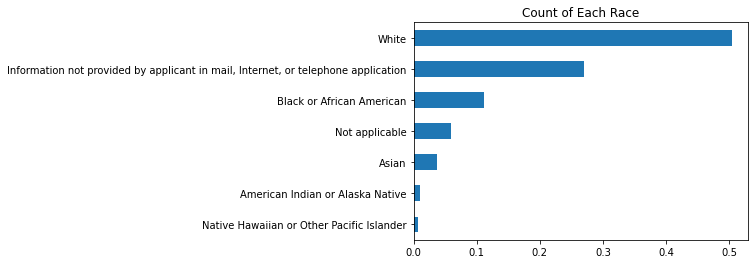

In [32]:
# Plot Value Counts of Race
prop_race = (df_2017['applicant_race_name_1'].value_counts() / df_2017.shape[0]).sort_values()
print(prop_race)
prop_race.plot(kind = 'barh',title = 'Count of Each Race')

applicant_race_name_1
Not applicable                                                                       0.022109
Information not provided by applicant in mail, Internet, or telephone application    0.169874
American Indian or Alaska Native                                                     0.185185
Native Hawaiian or Other Pacific Islander                                            0.227273
White                                                                                0.243168
Asian                                                                                0.268617
Black or African American                                                            0.275676
Name: denied, dtype: float64


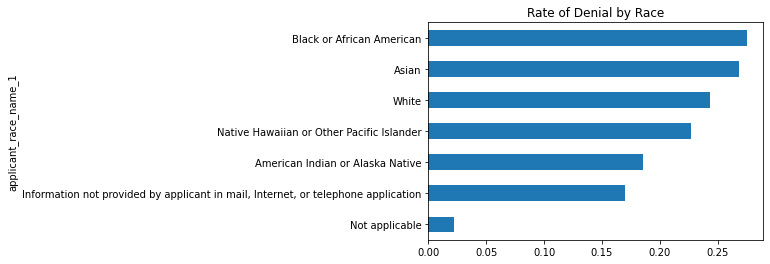

In [33]:
# Plot mean denial by race
mean_denial_by_race = df_2017.groupby(['applicant_race_name_1']).mean()['denied'].sort_values()
print(mean_denial_by_race)
mean_denial_by_race.plot(kind='barh', title='Rate of Denial by Race')

Not applicable                                                                       0.0596
Hispanic or Latino                                                                   0.1040
Information not provided by applicant in mail, Internet, or telephone application    0.2490
Not Hispanic or Latino                                                               0.5874
Name: applicant_ethnicity_name, dtype: float64


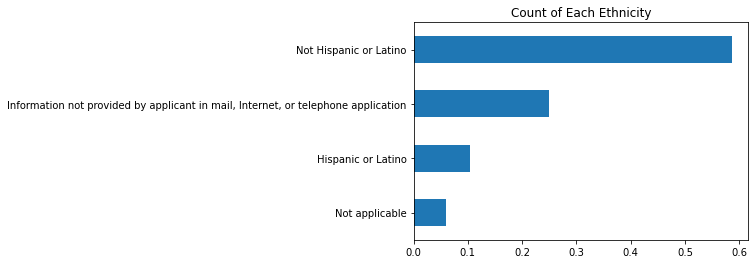

In [34]:
# Plot count of each ethnicity
prop_ethnicity = (df_2017['applicant_ethnicity_name'].value_counts() / df_2017.shape[0]).sort_values()
print(prop_ethnicity)
prop_ethnicity.plot(kind = 'barh',title = 'Count of Each Ethnicity')

applicant_ethnicity_name
Not applicable                                                                       0.021812
Information not provided by applicant in mail, Internet, or telephone application    0.160643
Not Hispanic or Latino                                                               0.244297
Hispanic or Latino                                                                   0.282692
Name: denied, dtype: float64


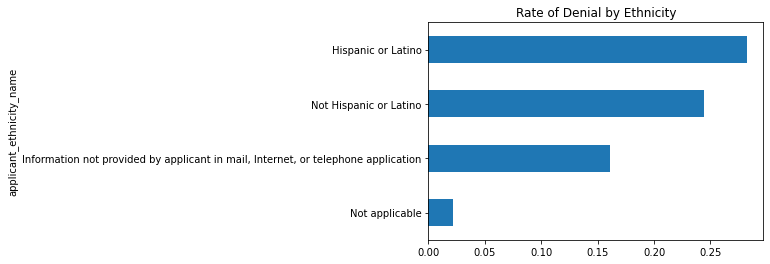

In [35]:
# Plot mean denial by ethnicicity
denial_rate_by_ethnicity = df_2017.groupby(['applicant_ethnicity_name']).mean()['denied'].sort_values()
print(denial_rate_by_ethnicity)
denial_rate_by_ethnicity.plot(kind='barh', title='Rate of Denial by Ethnicity')

loan_type_name
FSA/RHS-guaranteed    0.0131
VA-guaranteed         0.0836
FHA-insured           0.1767
Conventional          0.7266
dtype: float64


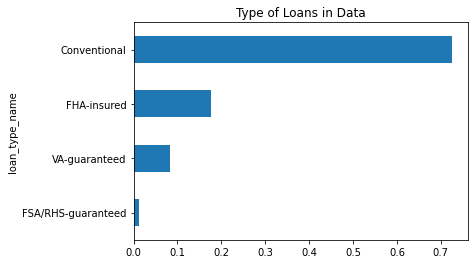

In [36]:
# Plot proportion of each type of loan in data
loan_prop = (df_2017.groupby('loan_type_name').size() / df_2017.shape[0]).sort_values()
print(loan_prop)
loan_prop.plot(kind = 'barh',title = 'Type of Loans in Data')

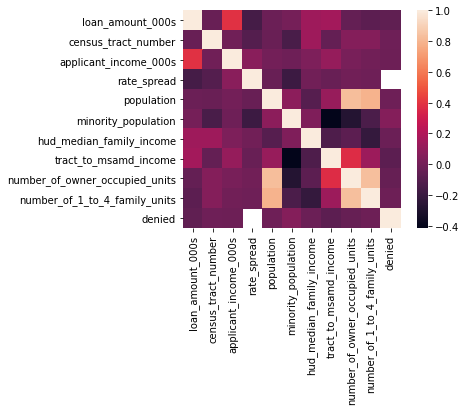

In [37]:
# Visualize correlation in Quantatative data
corrmat = df_2017.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True)

applicant_race_name_1
Black or African American                                                            65.0
American Indian or Alaska Native                                                     70.0
Not applicable                                                                       73.0
White                                                                                75.0
Information not provided by applicant in mail, Internet, or telephone application    82.0
Native Hawaiian or Other Pacific Islander                                            88.0
Asian                                                                                90.0
Name: applicant_income_000s, dtype: float64


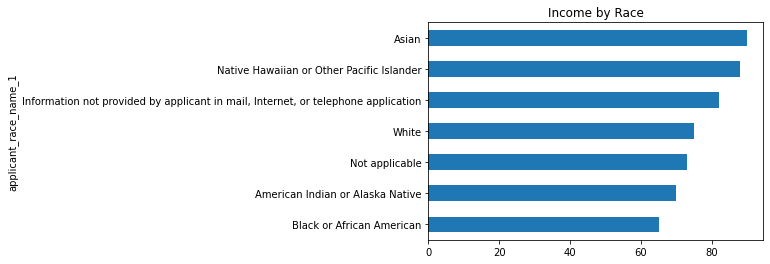

In [14]:
# Visualize applicant income by race
incomes_by_race = df_2017.groupby('applicant_race_name_1').median()['applicant_income_000s'].sort_values()
print(incomes_by_race)
incomes_by_race.plot(kind = 'barh',title = 'Income by Race')

applicant_ethnicity_name
Hispanic or Latino                                                                   62.0
Not applicable                                                                       72.5
Not Hispanic or Latino                                                               75.0
Information not provided by applicant in mail, Internet, or telephone application    85.0
Name: applicant_income_000s, dtype: float64


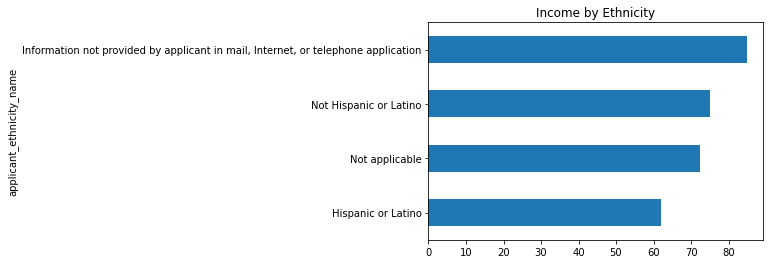

In [15]:
# Visualize applicant income by ethnicity
incomes_by_race = df_2017.groupby('applicant_ethnicity_name').median()['applicant_income_000s'].sort_values()
print(incomes_by_race)
incomes_by_race.plot(kind = 'barh',title = 'Income by Ethnicity')

# PARAGRAPH NOTES

For our project, we have decided to extract HDMA data from the consumer financial protection bureau on all records from 2017. In the future of our project, we may expand to include previous years, however, this data itself includes over 14 million observations and requires a lot of time to run and process, so including a range of data will be completed towards the end of the project, if decided. Additionally, we "randomly" select 10,000 rows for our analysis to save space/time, but will expand this to include all of the data after our code is complete. 

We have decided to focus on loan denial based on race and ethnicity, so we did some feature engineering to drop useless columns and create a binary column on a loan being denied/accepted. Additionally, there are several race columns, but the 2 through 5th listing had a majority of null values, so we decided to only use the first entry as the race of the individual. Since we are focusing on race, its important to note that the distribution in the data contains 64% White applicants, 11% Not provided, 10.5% Not applicable, and 13% part of a minority group. This distribution is poor, and raises other questions with the data collection that is useful for the project. However, it is still a good source for our project. For example, the mean denial rate for a white applicant [with all of the data] is .095, while the mean denial rate for an african american applicant is .174. This is a pretty drastic change, and is shown in a simple bar plot. 

We are also focusing on loan denial based on Ethnicity, so we did some exploration into the distribution of this feature. For Ethnicity we also had an undeven distribution like race with 59% not hispanic, 25% no information provided, 10% hispanic, and 6% not applicable. With this distribution we are questioning whether to consider ethnicity, since a lot more information is not included than the amount of hispanics in the data which could skew are results. We also had less difference between the denial rate for hispanic and not hispanic compared to the differences found in race as a result of minority groups also being present in the not hispanic group. Overall, we will likely focus our study mainly on Race but we will also consider ethnicity as another attribute since we will be able to run similar code for analysis based on race and ethnicity.  

One more thing we looked into was the prevalence of different types of loans in our data. We found that most loans in our data were Conventional with 73% and a good portion were FHA-insured with 18% and VA-guaranteed with 8%, but only 1% of the data is FSA/RHS-guaranteed. As a result of this distribution, we are planning on focusing our analysis on Conventional loans to avoid confounding factors, but may also apply the analysis we do to FHA-insured and VA-guaranteed loans to see if our findings translate to different types of loans. 
